In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties.umath import sqrt
import scipy.constants as c

In [17]:
bead_data = np.loadtxt('Daten/bead1.csv', delimiter = ',', skiprows = 2)
print(bead_data)
px_size = 49.7e-3 #in m

[[  1.      4.32 ]
 [  2.      8.958]
 [  3.      8.652]
 [  4.     17.755]
 [  5.     32.156]
 [  6.     76.102]
 [  7.    154.082]
 [  8.    189.57 ]
 [  9.    224.53 ]
 [ 10.    235.383]
 [ 11.    203.405]
 [ 12.    215.261]
 [ 13.    205.874]
 [ 14.    129.997]
 [ 15.     64.307]
 [ 16.     21.813]
 [ 17.      6.075]
 [ 18.      3.236]
 [ 19.      6.085]
 [ 20.      7.   ]]


Text(0, 0.5, 'Intensity [arb.u.]')

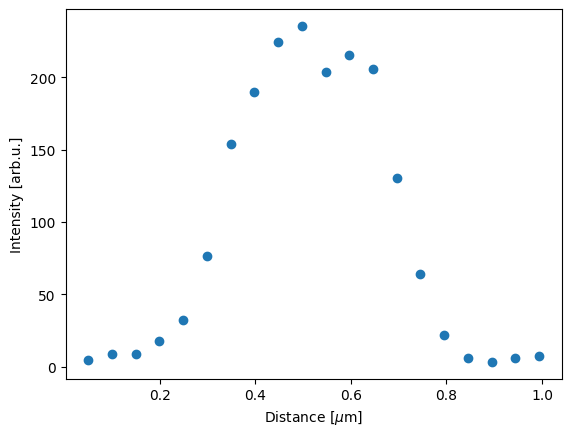

In [18]:
plt.scatter(px_size*bead_data[:,0], bead_data[:,1])
plt.xlabel(fr'Distance [$\mu$m]')
plt.ylabel('Intensity [arb.u.]')

In [34]:
fwhms = []

A     = 73.5+/-3.0 (arb.u.)
x0    = 0.617+/-0.007 µm
sigma = 0.175+/-0.010 µm
FWHM  = 0.412+/-0.023 µm
R^2   = 0.9638


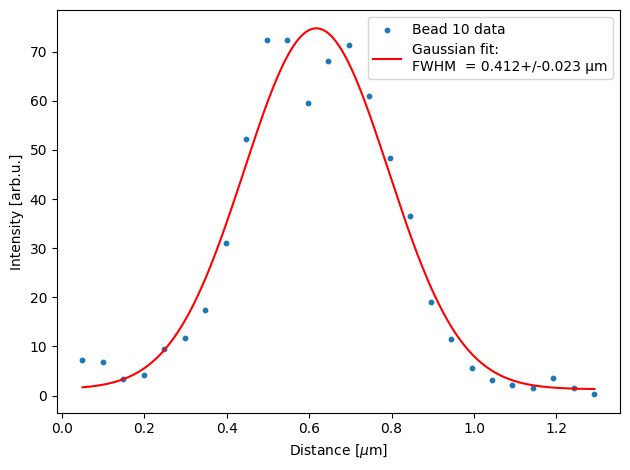

In [53]:
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
import matplotlib.pyplot as plt

beadn = 10
bead_data = np.loadtxt(fr'Daten/bead{beadn}.csv', delimiter = ',', skiprows = 2)
#print(bead_data)
px_size = 49.7e-3 #in m



# your data
x = px_size * bead_data[:, 0]      # [µm]
y = bead_data[:, 1]                # intensity

# Gaussian with constant background
def gauss(x, A, x0, sigma, C):
    """
    A    : amplitude
    x0   : center position
    sigma: standard deviation
    C    : constant background
    """
    return A * np.exp(-(x - x0)**2 / (2 * sigma**2)) + C

# initial guesses
A0    = y.max() - y.min()
x0_0  = x[np.argmax(y)]
sigma0 = (x.max() - x.min()) / 6.0
C0    = y.min()
p0    = [A0, x0_0, sigma0, C0]

# fit
popt, pcov = curve_fit(gauss, x, y, p0=p0)
A_fit, x0_fit, sigma_fit, C_fit = popt
dA, dx0, dsigma, dC = np.sqrt(np.diag(pcov))

# parameters with uncertainties
A      = ufloat(A_fit,     dA)
x0     = ufloat(x0_fit,    dx0)
sigma  = ufloat(sigma_fit, dsigma)
C      = ufloat(C_fit,     dC)

# FWHM = 2*sqrt(2*ln2)*sigma
fwhm_factor = 2.0 * np.sqrt(2.0 * np.log(2.0))
FWHM = fwhm_factor * sigma

print(f"A     = {A} (arb.u.)")
print(f"x0    = {x0} µm")
print(f"sigma = {sigma} µm")
print(f"FWHM  = {FWHM} µm")

# R^2
residuals = y - gauss(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - y.mean())**2)
R2 = 1 - ss_res/ss_tot
print(f"R^2   = {R2:.4f}")

# plot data + fit
x_fit = np.linspace(x.min(), x.max(), 500)

plt.figure()
plt.scatter(x, y, s=10, label=f"Bead {beadn} data")
plt.plot(x_fit, gauss(x_fit, *popt), 'r-', label=f"Gaussian fit: \nFWHM  = {FWHM} µm")
plt.xlabel(r'Distance [$\mu$m]')
plt.ylabel('Intensity [arb.u.]')
plt.legend()
plt.tight_layout()
plt.savefig(f'fit_bead_{beadn}.jpg', dpi = 100)
plt.show()

In [54]:
fwhms.append(FWHM)
print(fwhms)

[0.3618059809272232+/-0.02333725319339299, 0.3357821530890292+/-0.018965401052414097, 0.311658643060624+/-0.01041878098836254, 0.39171657899880385+/-0.0156649058615085, 0.33741305320016235+/-0.02257964144369024, 0.4096495865642731+/-0.028584162505514456, 0.36308726328385826+/-0.021677724700378154, 0.3726931385967107+/-0.013204978448614225, 0.3544779282536885+/-0.012641940909920987, 0.4121679038966659+/-0.02349357949280472]


In [56]:
from uncertainties import ufloat, unumpy

# unumpy.nominal_values and std_devs extract arrays
nominals = unumpy.nominal_values(fwhms)
std_devs = unumpy.std_devs(fwhms)

# simple arithmetic mean of the ufloat objects
mean_fwhm = sum(fwhms) / len(fwhms)

# or equivalently using numpy.mean
mean_fwhm_alt = np.mean(fwhms)

print(f"Mean FWHM = {mean_fwhm}")
print(f"Mean FWHM (via np.mean) = {mean_fwhm_alt}")

# extract components if needed
print(f"\nNominal value = {mean_fwhm.nominal_value:.6f} µm")
print(f"Standard error = {mean_fwhm.std_dev:.6f} µm")

# for completeness: weighted mean (optional)
weights = 1.0 / np.array(std_devs)**2
weighted_mean = np.sum(nominals * weights) / np.sum(weights)
weighted_error = 1.0 / np.sqrt(np.sum(weights))
weighted_ufloat = ufloat(weighted_mean, weighted_error)

print(f"\nWeighted mean FWHM = {weighted_ufloat}")

Mean FWHM = 0.365+/-0.006
Mean FWHM (via np.mean) = 0.365+/-0.006

Nominal value = 0.365045 µm
Standard error = 0.006278 µm

Weighted mean FWHM = 0.354+/-0.005


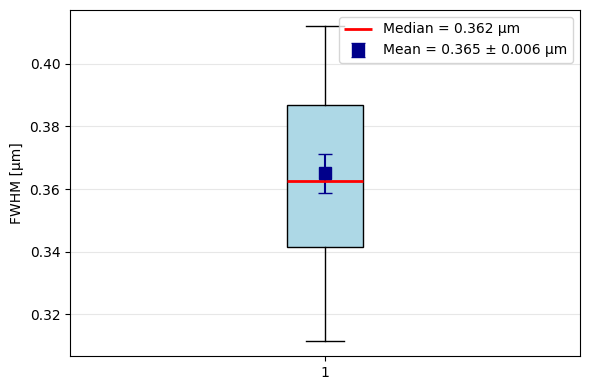

Median: 0.362 µm
Mean: 0.365 ± 0.006 µm
Std dev: 0.033 µm
Min: 0.312 µm
Max: 0.412 µm


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy

# your FWHM data
fwhms = [
    ufloat(0.3618059809272232, 0.02333725319339299),
    ufloat(0.3357821530890292, 0.018965401052414097),
    ufloat(0.311658643060624, 0.01041878098836254),
    ufloat(0.39171657899880385, 0.0156649058615085),
    ufloat(0.33741305320016235, 0.02257964144369024),
    ufloat(0.4096495865642731, 0.028584162505514456),
    ufloat(0.36308726328385826, 0.021677724700378154),
    ufloat(0.3726931385967107, 0.013204978448614225),
    ufloat(0.3544779282536885, 0.012641940909920987),
    ufloat(0.4121679038966659, 0.02349357949280472)
]

# extract nominal values for box plot
nominals = unumpy.nominal_values(fwhms)

# box plot
plt.figure(figsize=(6, 4))
box = plt.boxplot([nominals], label = [], patch_artist=True,
                  boxprops=dict(facecolor='lightblue', color='black'),
                  medianprops=dict(color='red', linewidth=2, label = f"Median = {np.median(nominals):.3f} µm"),
                  meanprops=dict(marker='o', markerfacecolor='green', markeredgecolor='green'),
                  showmeans=True)  # shows mean as green dot

# add mean value with error bar (uncertainty of the mean)
mean_fwhm = np.mean(fwhms)
plt.errorbar(1, mean_fwhm.nominal_value, yerr=mean_fwhm.std_dev,
             fmt='s', color='darkblue', markersize=8, capsize=5,
             label=f'Mean = {mean_fwhm.nominal_value:.3f} ± {mean_fwhm.std_dev:.3f} µm')

plt.ylabel('FWHM [µm]')
#plt.title('Distribution of FWHM Values (10 beads)')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('boxplot.jpg', dpi = 400)
plt.show()

# print statistics
print(f"Median: {np.median(nominals):.3f} µm")
print(f"Mean: {mean_fwhm.nominal_value:.3f} ± {mean_fwhm.std_dev:.3f} µm")
print(f"Std dev: {np.std(nominals, ddof=1):.3f} µm")
print(f"Min: {np.min(nominals):.3f} µm")
print(f"Max: {np.max(nominals):.3f} µm")




In [65]:
lat = (mean_fwhm**2 - 0.04**2)**0.5

print(lat)

0.363+/-0.006
